In [1]:
path_file = r"C:\Users\Administrator\Desktop\华为软件精英挑战赛\code\319\WindowsReleasev1.1\maps\map2.txt"

# 读取文件内容并存储为列表
with open(path_file, 'r') as file:
    map_list = [line.strip() for line in file.readlines()]

In [2]:
def get_obstacles(the_map):
    obstacles = []
    for i in range(len(the_map)):
        for j in range(len(the_map)):
            if the_map[i][j] == '#' or the_map[i][j] =='*':  # 如果为‘#’，则为障碍物
                x = i 
                y = j
                obstacle = (x, y)
                obstacles.append(obstacle)
    
    return  obstacles

In [3]:
ob=get_obstacles(map_list)

In [4]:
b=[(2,112),(19,86),(28,72),(31,61),(37,41),
   (2,160),(2,187),(116,2),(134,2),(171,2)]

In [12]:
import time
import numpy as np
from collections import deque

from collections import deque
import numpy as np

def is_valid(x, y, rows, cols):
    return 0 <= x < rows and 0 <= y < cols

def find_paths(initial_position, obstacle_coordinates, rows, cols):
    obstacles = set(obstacle_coordinates)
    paths = np.zeros((rows, cols), dtype=int) -1  # Initialize with -1 to represent unvisited cells
    paths_len = np.zeros((rows, cols), dtype=int) + 99999
    single_path = []

    start_x, start_y = initial_position

    visited = set()
    queue = deque([(start_x, start_y)])

    paths[start_x][start_y] = 0  # Distance to the initial position is 0
    paths_len[start_x][start_y] = 0

    while queue:
        current_x, current_y = queue.popleft()

        if (current_x, current_y) not in visited:
            visited.add((current_x, current_y))

            valid_directions = 0
            for dx, dy, direction in [(-1, 0, 1), (1, 0, 2), (0, -1, 3), (0, 1, 4)]:
                new_x, new_y = current_x + dx, current_y + dy

                if is_valid(new_x, new_y, rows, cols) and (new_x, new_y) not in obstacles:
                    valid_directions+=1

                if is_valid(new_x, new_y, rows, cols) and (new_x, new_y) not in visited and (new_x, new_y) not in obstacles:
                    paths[new_x][new_y] = direction
                    paths_len[new_x][new_y] = paths_len[current_x][current_y] + 1
                    queue.append((new_x, new_y))
                   

            if valid_directions == 2:
                single_path.append((current_x, current_y))

    return paths, paths_len, single_path


# 示例用法：
initial_position = b[1]
obstacle_coordinates = ob
rows, cols = 200, 200


# 记录开始时间
start_time = time.time()


result_A_all=[]
for i in range(10):
    result_A = find_paths(b[i], obstacle_coordinates, rows, cols)
    result_A_all.append(result_A)
print(result_A)

# 记录结束时间

end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time

print(f"astar函数运行时间: {elapsed_time} 秒")
# # 示例用法：
# initial_position = (0, 0)
# obstacle_coordinates = [(1, 0), (2, 2), (3, 4)]
# rows, cols = 5, 5

# result = find_paths(initial_position, obstacle_coordinates, rows, cols)
# print(result)

(array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]), array([[99999, 99999, 99999, ..., 99999, 99999, 99999],
       [99999, 99999, 99999, ..., 99999, 99999, 99999],
       [99999, 99999, 99999, ..., 99999, 99999, 99999],
       ...,
       [99999, 99999, 99999, ..., 99999, 99999, 99999],
       [99999, 99999, 99999, ..., 99999, 99999, 99999],
       [99999, 99999, 99999, ..., 99999, 99999, 99999]]), [(171, 2), (174, 2), (164, 4), (163, 5), (162, 6), (161, 7), (160, 8), (159, 9), (190, 4), (158, 10), (191, 5), (192, 6), (193, 7), (194, 8), (195, 9), (196, 10), (152, 8), (151, 7), (150, 6), (149, 5), (148, 4), (139, 17), (158, 42), (159, 43), (160, 44), (161, 45), (162, 46), (163, 47), (164, 48), (164, 52), (137, 2), (163, 53), (134, 2), (152, 44), (162, 54), (151, 45), (161, 55), (196, 42), (195, 43)

In [9]:
def extract_path(direction_table, target_position):
    target_x, target_y = target_position
    path = [(target_x, target_y)]

    while direction_table[target_x][target_y] != 0:
        direction = direction_table[target_x][target_y]
        if direction == 1:
            target_x += 1
        elif direction == 2:
            target_x -= 1
        elif direction == 3:
            target_y += 1
        elif direction == 4:
            target_y -= 1

        path.insert(0, (target_x, target_y))

    return path
    

In [10]:
path1=extract_path(result_A_all[0][0],(194,186))

astar函数运行时间: 0.0 秒


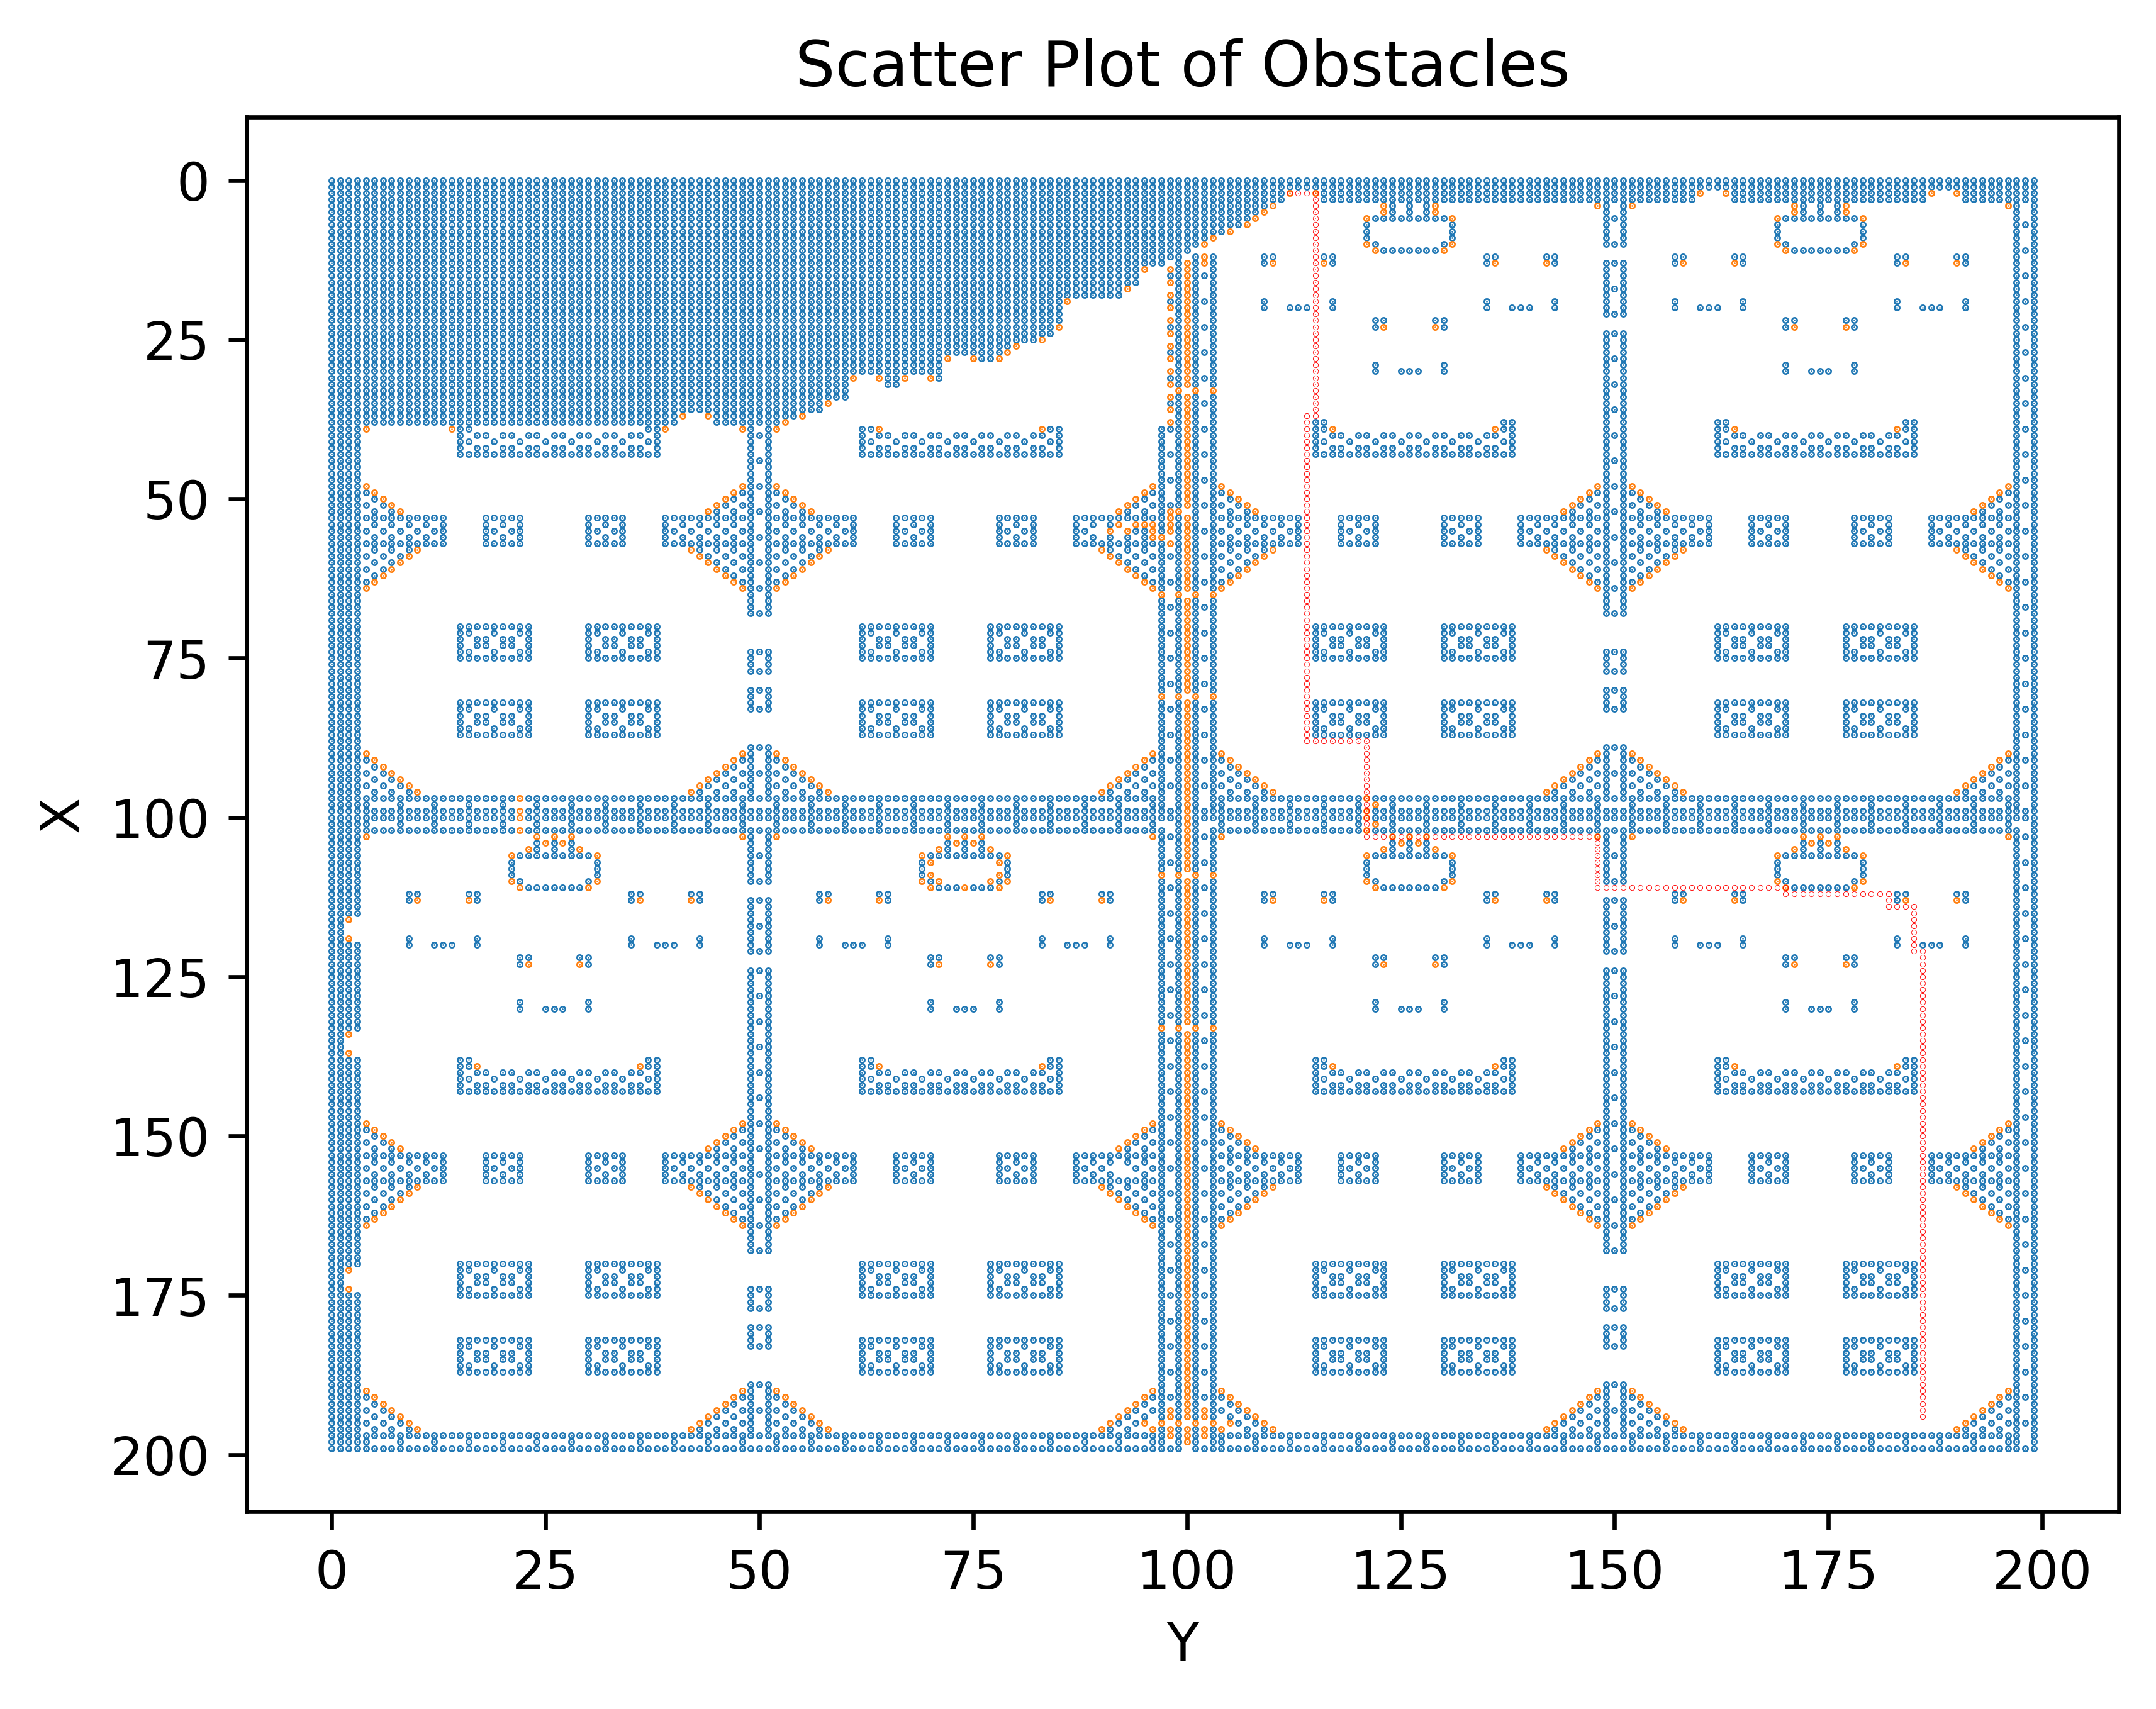

In [13]:
import matplotlib.pyplot as plt
# 创建一个画布和坐标轴
# 提取 x 和 y 坐标
x_values = [o[0] for o in ob]
y_values = [o[1] for o in ob]
fig, ax = plt.subplots(dpi=600)



x_1=[o[0] for o in result_A[2]]
y_2=[o[1] for o in result_A[2]]

# 绘制散点图
ax.scatter(y_values,x_values,s=0.1, label='Obstacles')
ax.scatter(y_2,x_1,s=0.1, label='Obstacles')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_title('Scatter Plot of Obstacles')

import time


# 记录开始时间
start_time = time.time()

# path=paths_table[(171,2,5,195)]


# 记录结束时间
end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time

print(f"astar函数运行时间: {elapsed_time} 秒")


px=[o[0] for o in path1]

py=[o[1] for o in path1]

ax.scatter(py, px, s=0.01, label='Path', color='red')


# 旋转坐标轴
# ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
# 显示画布

plt.show()

In [91]:
from collections import deque
import random
def is_valid(x, y, rows, cols):
    return 0 <= x < rows and 0 <= y < cols

def find_paths(initial_positions, obstacle_coordinates, rows, cols):
    obstacles = set(obstacle_coordinates)
    paths = {}

    for start_x, start_y in initial_positions:
        visited = set()
        queue = deque([(start_x, start_y, [])])

        while queue:
            current_x, current_y, path = queue.popleft()

            if (current_x, current_y) not in visited:
                visited.add((current_x, current_y))

                if (current_x, current_y) not in obstacles:
                    current_path = path + [(current_x, current_y)]
                    paths[(start_x, start_y, current_x, current_y)] = current_path

                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        new_x, new_y = current_x + dx, current_y + dy

                        if is_valid(new_x, new_y, rows, cols) and (new_x, new_y) not in visited:
                            queue.append((new_x, new_y, current_path))

    return paths

# 示例使用
rows, cols = 200, 200
# 随机生成10000个障碍物坐标
num_obstacles = 10000
obstacle_coordinates = ob
initial_positions = b
paths_table = find_paths(initial_positions, obstacle_coordinates, rows, cols)


In [86]:
b

[(2, 112),
 (19, 86),
 (28, 72),
 (31, 61),
 (37, 41),
 (2, 160),
 (2, 187),
 (116, 2),
 (134, 2),
 (171, 2)]

In [40]:
obstacle_coordinates

[(131, 106),
 (32, 94),
 (80, 182),
 (3, 126),
 (2, 96),
 (85, 104),
 (178, 107),
 (198, 121),
 (65, 31),
 (126, 170),
 (86, 157),
 (36, 155),
 (142, 193),
 (162, 50),
 (54, 1),
 (15, 121),
 (195, 122),
 (21, 65),
 (14, 187),
 (77, 6),
 (64, 108),
 (110, 38),
 (146, 124),
 (39, 8),
 (161, 192),
 (117, 107),
 (88, 134),
 (48, 189),
 (20, 183),
 (0, 102),
 (77, 137),
 (148, 91),
 (123, 115),
 (81, 53),
 (38, 129),
 (22, 178),
 (23, 11),
 (0, 45),
 (19, 3),
 (57, 165),
 (199, 133),
 (148, 128),
 (150, 67),
 (197, 128),
 (146, 119),
 (186, 190),
 (13, 182),
 (82, 18),
 (26, 14),
 (16, 73),
 (42, 187),
 (59, 160),
 (134, 132),
 (111, 60),
 (177, 92),
 (160, 42),
 (107, 164),
 (128, 124),
 (151, 76),
 (48, 38),
 (90, 91),
 (82, 76),
 (133, 92),
 (117, 91),
 (27, 137),
 (146, 18),
 (74, 78),
 (8, 189),
 (75, 107),
 (15, 32),
 (33, 30),
 (8, 20),
 (69, 75),
 (95, 180),
 (197, 145),
 (34, 154),
 (13, 102),
 (154, 95),
 (95, 139),
 (50, 89),
 (30, 99),
 (78, 58),
 (65, 112),
 (185, 4),
 (191, 85

obstacle_coordinates

In [56]:
for key in paths_table:
    print(key)
    break

(2, 112, 2, 112)


In [93]:
len(paths_table[(2,112,194,13)])

292

astar函数运行时间: 0.0 秒


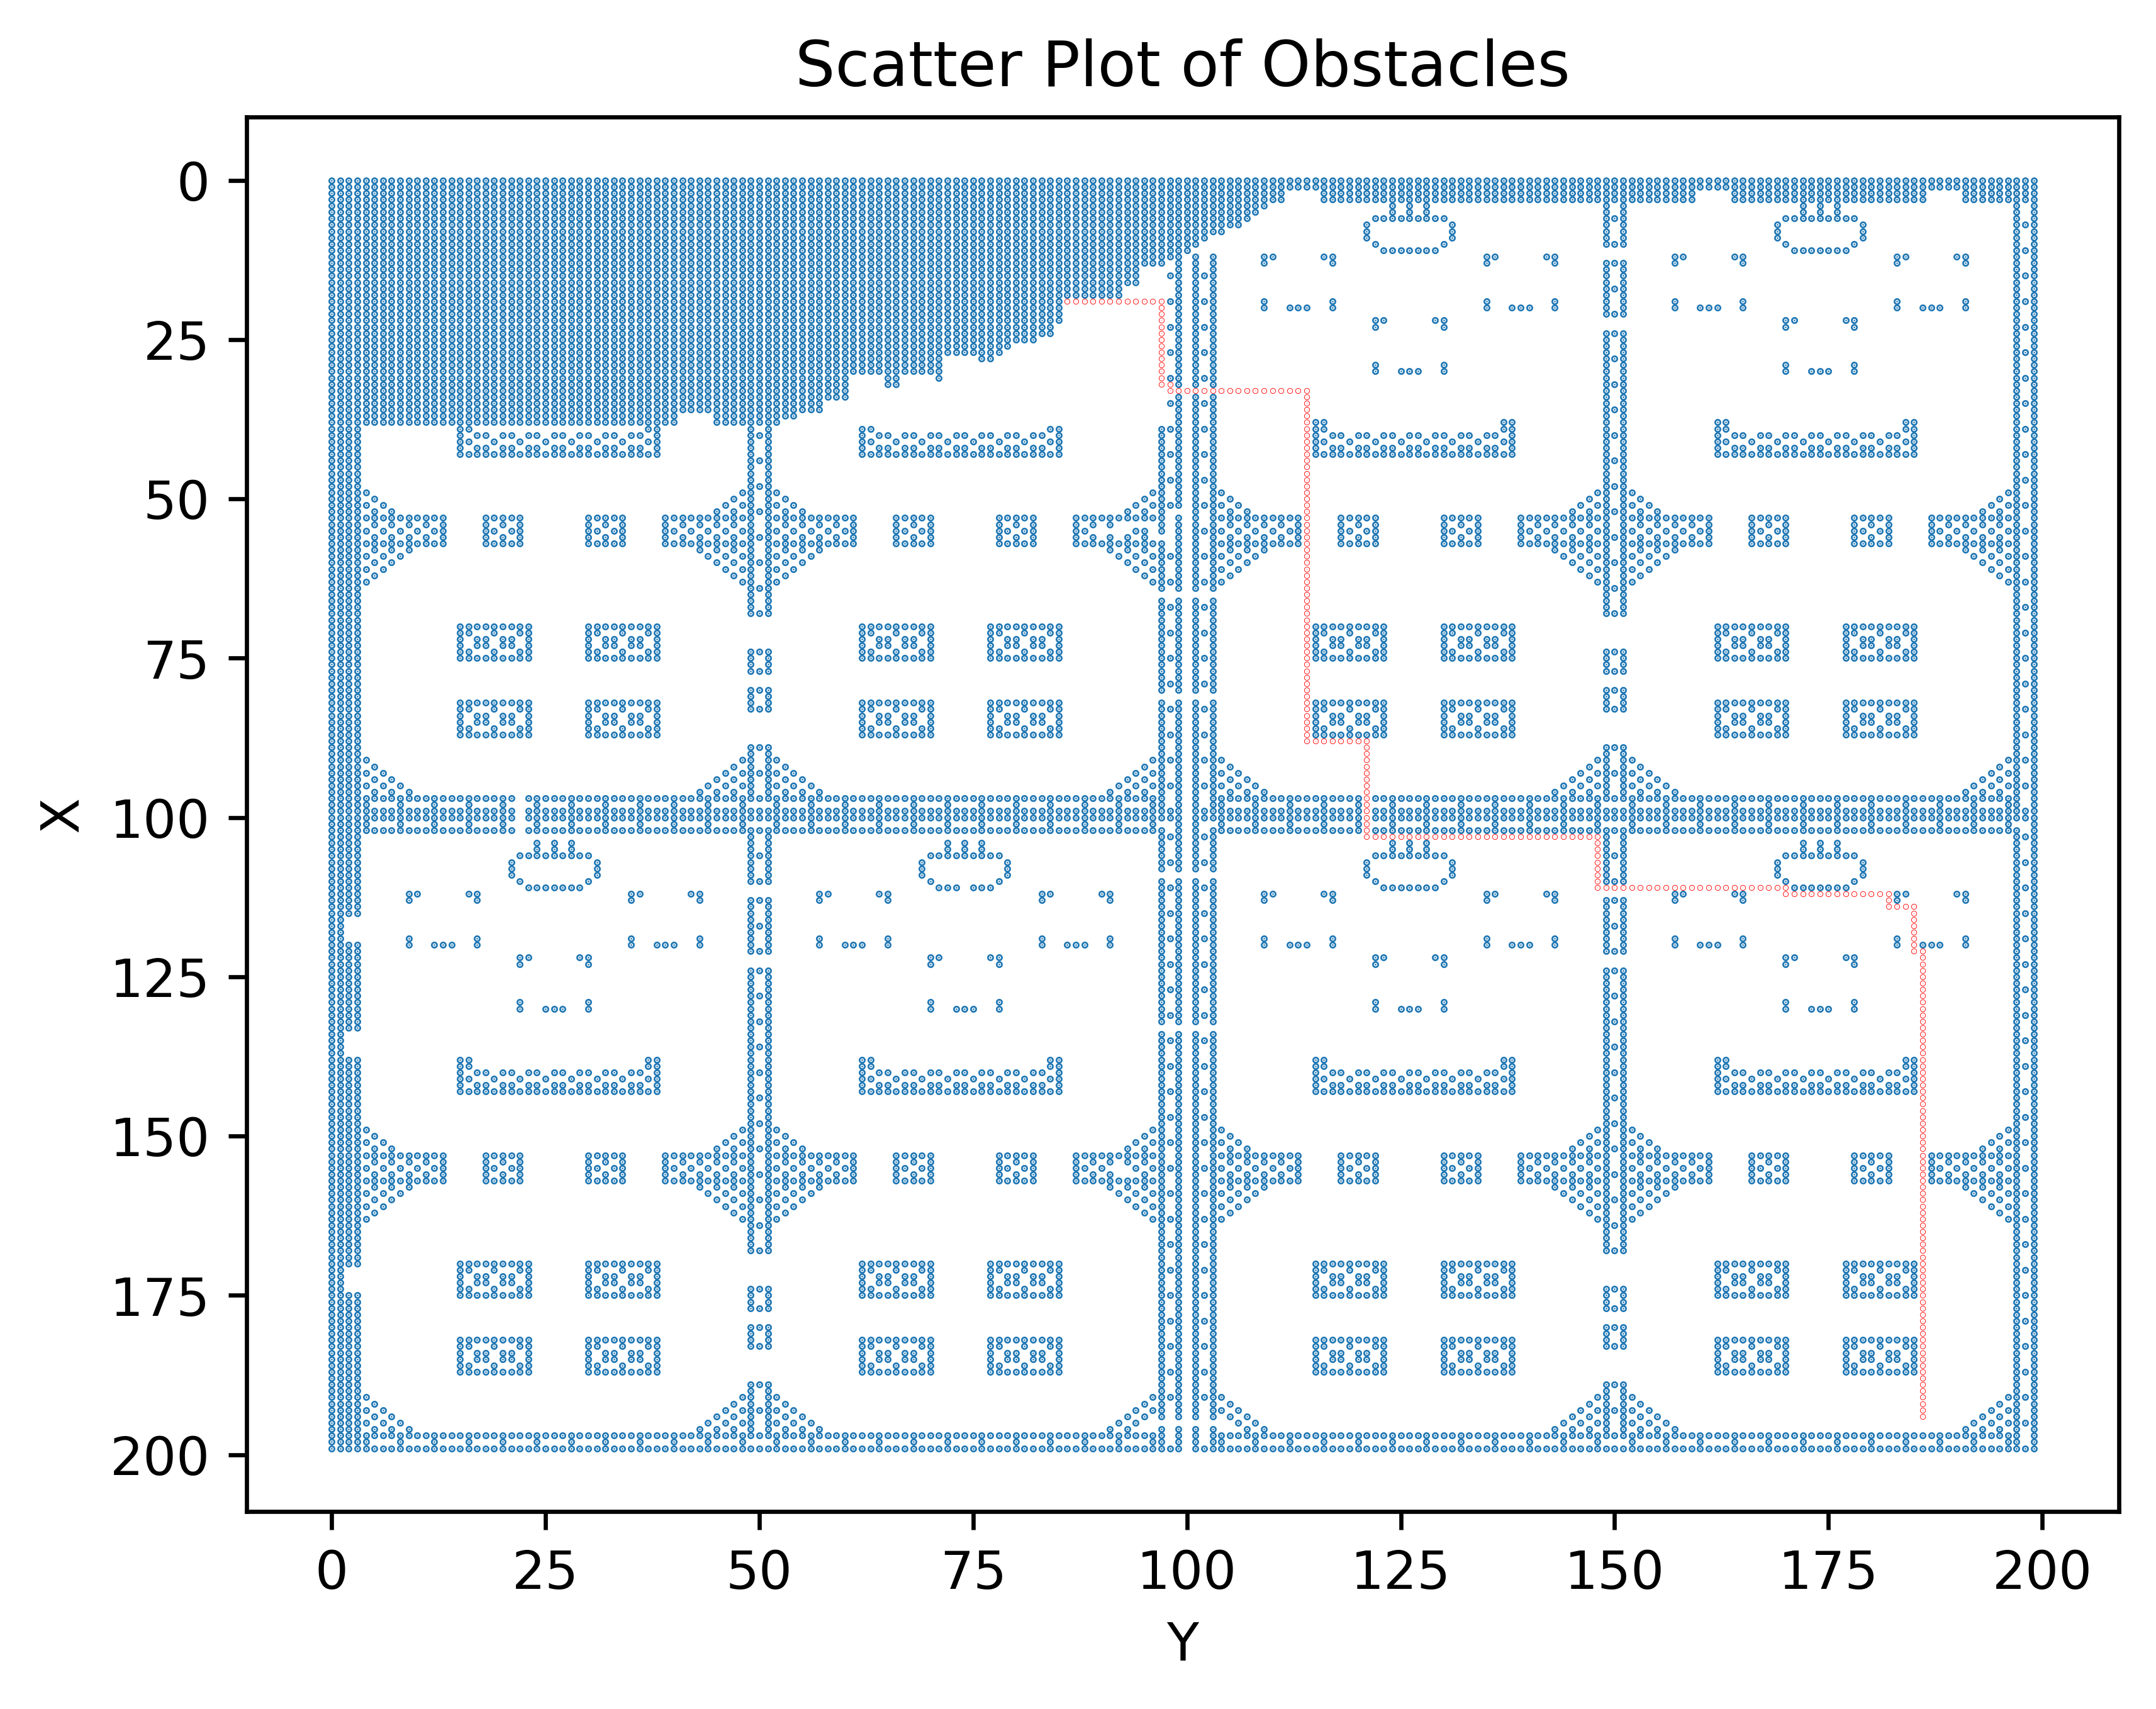

In [170]:
import matplotlib.pyplot as plt
# 创建一个画布和坐标轴
# 提取 x 和 y 坐标
x_values = [o[0] for o in ob]
y_values = [o[1] for o in ob]
fig, ax = plt.subplots(dpi=600)

# 绘制散点图
ax.scatter(y_values,x_values,s=0.1, label='Obstacles')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_title('Scatter Plot of Obstacles')

import time


# 记录开始时间
start_time = time.time()

# path=paths_table[(171,2,5,195)]


# 记录结束时间
end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time

print(f"astar函数运行时间: {elapsed_time} 秒")


px=[o[0] for o in path1]

py=[o[1] for o in path1]

ax.scatter(py, px, s=0.01, label='Path', color='red')


# 旋转坐标轴
# ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
# 显示画布

plt.show()


In [3]:
def get_obstacles(the_map):
    obstacles = []
    for i in range(len(the_map)):
        for j in range(len(the_map)):
            if the_map[i][j] == '#' or the_map[i][j] =='*':  # 如果为‘#’，则为障碍物
                x = i 
                y = j
                obstacle = (x, y)
                obstacles.append(obstacle)
    
    return  obstacles

In [4]:
ob=get_obstacles(map_list)

In [5]:
b=[(2,112),(19,86),(28,72),(31,61),(37,41),
   (2,160),(2,187),(116,2),(134,2),(171,2)]

In [6]:
len(paths_table )

NameError: name 'paths_table' is not defined

In [7]:
len(ob)

11116

In [108]:
table_size = sys.getsizeof(paths_table)
print(f"paths_table 占用的内存大小: {table_size} 字节")

paths_table 占用的内存大小: 10485856 字节


In [109]:
import sys

def get_dict_size(my_dict):
    total_size = sys.getsizeof(my_dict)
    
    for key, value in my_dict.items():
        total_size += sys.getsizeof(key)
        total_size += sys.getsizeof(value)
        if isinstance(value, list):
            total_size += sum(sys.getsizeof(item) for item in value)

    return total_size

my_dict = {'key1': [1, 2, 3], 'key2': [4, 5, 6], 'key3': [7, 8, 9]}

size_of_dict = get_dict_size(paths_table)

print(f"Size of the dictionary: {size_of_dict} bytes")


Size of the dictionary: 2870369056 bytes


In [116]:
import numpy as np

# 定义矩阵的大小
rows = 200
cols = 200
depth = 2

# 定义数据类型为int8
dtype = np.uint16

# 计算每个元素占用的字节数
element_size = np.dtype(dtype).itemsize

# 计算总元素数量
total_elements = rows * cols * depth

# 计算总内存空间
total_memory = total_elements * element_size

# 打印结果
print(f"矩阵占用的内存空间: {total_memory / (1024**2):.2f} MB")


矩阵占用的内存空间: 0.15 MB


In [8]:
import time
import numpy as np
from collections import deque

def is_valid(x, y, rows, cols):
    return 0 <= x < rows and 0 <= y < cols

def find_paths(initial_position, obstacle_coordinates, rows, cols):
    obstacles = set(obstacle_coordinates)
    paths = np.zeros((rows, cols), dtype=int)   # Initialize with -1 to represent unvisited cells
    paths_len=np.zeros((rows, cols), dtype=int)
    start_x, start_y = initial_position

    visited = set()
    queue = deque([(start_x, start_y)])

    paths[start_x][start_y] = 0  # Distance to the initial position is 0
    paths_len[start_x][start_y] = 0
    while queue:
        current_x, current_y = queue.popleft()

        if (current_x, current_y) not in visited:
            visited.add((current_x, current_y))

            for dx, dy, direction in [(-1, 0, 1), (1, 0, 2), (0, -1, 3), (0, 1, 4)]:
                new_x, new_y = current_x + dx, current_y + dy

                if is_valid(new_x, new_y, rows, cols) and (new_x, new_y) not in visited and (new_x, new_y) not in obstacles:
                    paths[new_x][new_y] = direction
                    paths_len[new_x][new_y] = paths_len[current_x][current_y]+1
                    queue.append((new_x, new_y))

    return paths,paths_len

# 示例用法：
initial_position = b[1]
obstacle_coordinates = ob
rows, cols = 200, 200


# 记录开始时间
start_time = time.time()


result_A_all=[]
for i in range(10):
    result_A = find_paths(b[i], obstacle_coordinates, rows, cols)
    result_A_all.append(result_A)
print(result_A)

# 记录结束时间

end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time

print(f"astar函数运行时间: {elapsed_time} 秒")
# # 示例用法：
# initial_position = (0, 0)
# obstacle_coordinates = [(1, 0), (2, 2), (3, 4)]
# rows, cols = 5, 5

# result = find_paths(initial_position, obstacle_coordinates, rows, cols)
# print(result)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))
astar函数运行时间: 0.6162843704223633 秒


In [12]:
obstacle_coordinates

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [14]:
(result_A_all[0][1][15:25,80:90])

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 71, 70, 69, 68],
       [ 0,  0,  0,  0,  0,  0, 70, 69, 68, 67],
       [ 0,  0,  0,  0,  0,  0, 69, 68, 67, 66],
       [ 0,  0,  0,  0,  0,  0, 68, 67, 66, 65],
       [ 0,  0,  0,  0,  0, 68, 67, 66, 65, 64],
       [ 0,  0,  0,  0,  0, 67, 66, 65, 64, 63]])

Paths:
[[0 4 4 4 4]
 [0 0 0 2 2]
 [0 0 0 2 2]
 [0 0 0 2 2]
 [3 3 3 2 2]]


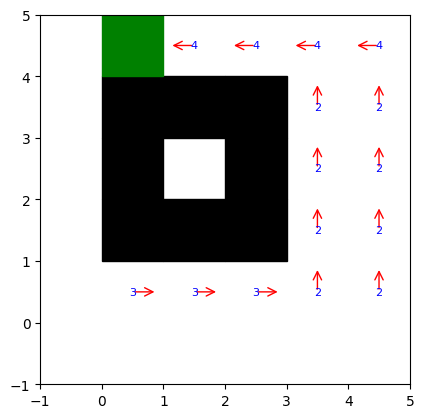

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def is_valid(x, y, rows, cols):
    return 0 <= x < rows and 0 <= y < cols

def visualize_paths(paths, obstacles, start):
    rows, cols = paths.shape
    fig, ax = plt.subplots()

    # Plot obstacles
    for obstacle in obstacles:
        ax.add_patch(plt.Rectangle((obstacle[1], rows - obstacle[0] - 1), 1, 1, color='black'))

    # Plot start position
    ax.add_patch(plt.Rectangle((start[1], rows - start[0] - 1), 1, 1, color='green'))

    # Plot arrows for paths
    for x in range(rows):
        for y in range(cols):
            direction = paths[x, y]
            if direction > 0:
                if direction == 2:
                    arrow = FancyArrowPatch((y + 0.5, rows - x - 0.5), (y + 0.5, rows - x - 0.5 + 0.4),
                                            arrowstyle='->', mutation_scale=15, color='red')
                elif direction == 1:
                    arrow = FancyArrowPatch((y + 0.5, rows - x - 0.5), (y + 0.5, rows - x - 0.5 - 0.4),
                                            arrowstyle='->', mutation_scale=15, color='red')
                elif direction == 4:
                    arrow = FancyArrowPatch((y + 0.5, rows - x - 0.5), (y + 0.5 - 0.4, rows - x - 0.5),
                                            arrowstyle='->', mutation_scale=15, color='red')
                elif direction == 3:
                    arrow = FancyArrowPatch((y + 0.5, rows - x - 0.5), (y + 0.5 + 0.4, rows - x - 0.5),
                                            arrowstyle='->', mutation_scale=15, color='red')

                ax.add_patch(arrow)
                ax.text(y + 0.5, rows - x - 0.5, str(direction), ha='center', va='center', fontsize=8, color='blue')

    ax.set_xlim(-1, cols)
    ax.set_ylim(-1, rows)
    ax.set_aspect('equal', adjustable='box')
    plt.show()

# Example usage:
initial_position = (0, 0)
obstacle_coordinates = [(1, 0), (2, 0), (3, 0),(3, 1), (3, 2), (2, 2),(1,2),(1,1)]
rows, cols = 5, 5

result = find_paths(initial_position, obstacle_coordinates, rows, cols)
print("Paths:")
print(result)

visualize_paths(result, obstacle_coordinates, initial_position)


In [2]:
def extract_path(direction_table, target_position):
    target_x, target_y = target_position
    path = [(target_x, target_y)]

    while direction_table[target_x][target_y] != 0:
        direction = direction_table[target_x][target_y]
        if direction == 1:
            target_x += 1
        elif direction == 2:
            target_x -= 1
        elif direction == 3:
            target_y += 1
        elif direction == 4:
            target_y -= 1

        path.insert(0, (target_x, target_y))

    return path
    



In [25]:
# 记录开始时间
start_time = time.time()

# for i in range(10):
path1=extract_path(result_A_all[0][0],(194,186))


# 记录结束时间

end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time

print(f"astar函数运行时间: {elapsed_time} 秒")



astar函数运行时间: 0.0010006427764892578 秒


In [27]:
path1

[(2, 112),
 (2, 113),
 (2, 114),
 (2, 115),
 (3, 115),
 (4, 115),
 (5, 115),
 (6, 115),
 (7, 115),
 (8, 115),
 (9, 115),
 (10, 115),
 (11, 115),
 (12, 115),
 (13, 115),
 (14, 115),
 (15, 115),
 (16, 115),
 (17, 115),
 (18, 115),
 (19, 115),
 (20, 115),
 (21, 115),
 (22, 115),
 (23, 115),
 (24, 115),
 (25, 115),
 (26, 115),
 (27, 115),
 (28, 115),
 (29, 115),
 (30, 115),
 (31, 115),
 (32, 115),
 (33, 115),
 (34, 115),
 (35, 115),
 (36, 115),
 (37, 115),
 (37, 114),
 (38, 114),
 (39, 114),
 (40, 114),
 (41, 114),
 (42, 114),
 (43, 114),
 (44, 114),
 (45, 114),
 (46, 114),
 (47, 114),
 (48, 114),
 (49, 114),
 (50, 114),
 (51, 114),
 (52, 114),
 (53, 114),
 (54, 114),
 (55, 114),
 (56, 114),
 (57, 114),
 (58, 114),
 (59, 114),
 (60, 114),
 (61, 114),
 (62, 114),
 (63, 114),
 (64, 114),
 (65, 114),
 (66, 114),
 (67, 114),
 (68, 114),
 (69, 114),
 (70, 114),
 (71, 114),
 (72, 114),
 (73, 114),
 (74, 114),
 (75, 114),
 (76, 114),
 (77, 114),
 (78, 114),
 (79, 114),
 (80, 114),
 (81, 114),
 (8